# Tarea 4: Error numérico


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Integración trapezoidal

$$
\int_a^b f(x)\, dx=\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{k=1}^{n-1}f\left(a+k\cdot\frac{b-a}{n}\right)\right)
$$

In [1]:
ruta = "velocidades.txt"
vel = open(ruta,'r')
lineas =  vel.readlines()
vel.close()

In [4]:
lineas
velocidades = []
tiempos = []
for linea in lineas:
    t,v = linea.split('\t')
    velocidades.append(float(v))
    tiempos.append(float(t))

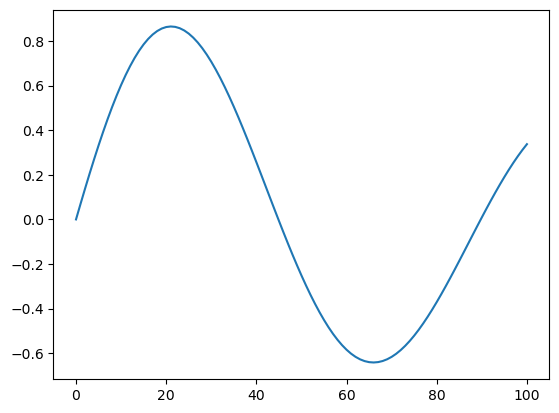

In [9]:
plt.plot(tiempos,velocidades);

In [12]:
def vel(i):
    return velocidades[int(i)]

In [13]:
#Integración trapecio
def trapecio(f,a,b,n):
    h = (b-a)/n
    x = [a+h*i for i in range(0,n+1)]
    sum = 0
    for i in range(1,n):
        sum += f(x[i])
        #sum += f(a+i*(b-a)/n)

    return (b-a)/n*((f(a)+f(b))/2+sum)

In [14]:
trapecio(vel,0,100,100)

8.21892400000002

In [15]:
def posiciones(tiempos):
    pos = [0]
    sum = 0
    for i in range(0,100):
        sum += trapecio(vel,i,i+1,1)
        pos.append(sum)
    return pos

Text(0.5, 0, 'Tiempos')

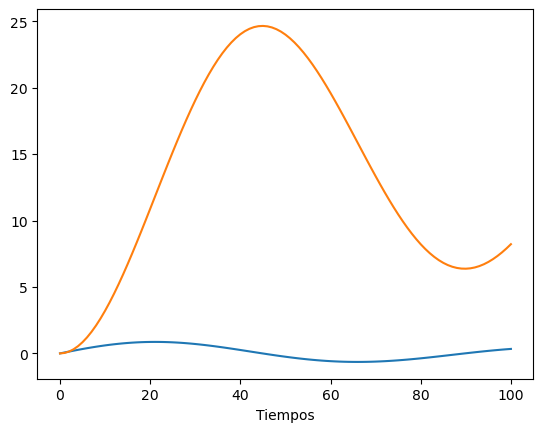

In [16]:
plt.plot(tiempos, velocidades)
plt.plot(tiempos,posiciones(tiempos))
plt.xlabel("Tiempos")

# Integración método de Simpson

\begin{align}
\int_a^b f(x)\, dx&=\frac{h}{3}[f(x_0)+4f(x_1)+2f(x_2)+4f(x_3)+2f(x_2)+…+2f(x_{n-2})+4f(x_{n-1})+f(x_n)]\\
&=\sum_{j\ \text{par}}^{n/2} 2f(x_{2i})+\sum_{i\ \text{impar}}^{n/2+1} 4f(x_{2i-1})+ f(x_0)-f(x_n)
\end{align}

In [19]:
def func(x): return x**4-2*x+1

In [20]:
#Simpson
def simpson(f,a,b,n):
    h = (b-a)/n
    sum = 0
    S0 = f(a)-f(b)
    #x = [a+i*h for i in range(0,101)]
    for i in range(1,int(n/2)+1):
        sum += 4*f(a+(2*i-1)*h)+2*f(a+(2*i)*h)
    return h/3*(sum+S0)

In [24]:
trap = trapecio(func,0,2,10)
simp = simpson(func,0,2,10)
print("Trapecio:",trap,"  Simpson:",simp)

Trapecio: 4.50656   Simpson: 4.400426666666667


In [26]:
#b)Error numérico
print("Trapecio :",abs(trap-4.4))
print("Simpson: ",abs(simp-4.4))

Trapecio : 0.10655999999999999
Simpson:  0.0004266666666667973


In [27]:
trap100 = trapecio(func,0,2,100)
simp100 = simpson(func,0,2,100)
print("Trapecio:",trap100,"  Simpson:",simp100)

Trapecio: 4.401066656   Simpson: 4.400000042666667


In [28]:
trap1000 = trapecio(func,0,2,1000)
simp1000 = simpson(func,0,2,1000)
print("Trapecio:",trap1000,"  Simpson:",simp1000)

Trapecio: 4.4000106666656   Simpson: 4.400000000004266
